### House Sales in King Country, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015

| Variable | Description |
| :--- | :--- |
| **id** | A notation for a house |
| **date** | Date house was sold |
| **price** | Price is prediction target |
| **bedrooms** | Number of bedrooms |
| **bathrooms** | Number of bathrooms |
| **sqft_living** | Square footage of the home |
| **sqft_lot** | Square footage of the lot |
| **floors** | Total floors (levels) in house |
| **waterfront** | House which has a view to a waterfront |
| **view** | Has been viewed |
| **condition** | How good the condition is overall |
| **grade** | Overall grade given to the housing unit, based on King County grading system |
| **sqft_above**| Square footage of house apart from basement |
| **sqft_basement**| Square footage of the basement |
| **yr_built** | Built Year |
| **yr_renovated**| Year when house was renovated |
| **zipcode** | Zip code |
| **lat** | Latitude coordinate |
| **long** | Longitude coordinate |
| **sqft_living15**| Living room area in 2015 (implies-- some renovations) This might or might not have affected the lot size area |
| **sqft_lot15** | Lot Size area in 2015 (implies-- some renovations) |

In [1]:
# Install required libraries
! pip install pandas; numpy; seaborn; matplotlib; sklearn; skillsnetwork; seaborn; kagglehub

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [2]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import zipfile
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### Importing Data Sets

In [3]:
# --- Step 1: Define the local zip file name ---
# This script assumes 'housesalesprediction.zip' is in the SAME FOLDER as your notebook.
zip_file_name = 'housesalesprediction.zip' 
print(f"Looking for local file: '{zip_file_name}'")


# --- Step 2: Extract the CSV file from the local .zip ---
try:
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        # Extract all files to the current working directory
        zip_ref.extractall('.')
    print("File extracted successfully.")
except FileNotFoundError:
    print(f"ERROR: File '{zip_file_name}' not found!")
    print("Please make sure you have downloaded the file and moved it to the same folder as this notebook.")
    # Exit if file not found
    exit()
except Exception as e:
    print(f"An error occurred during extraction: {e}")
    # Exit on other errors
    exit()


# --- Step 3: Load the data into a Pandas DataFrame ---
# From the Kaggle page, we know the file inside is named 'kc_house_data.csv'
csv_file_name = 'kc_house_data.csv'

try:
    df = pd.read_csv(csv_file_name)
    print(f"Data from '{csv_file_name}' loaded into DataFrame successfully.")

except FileNotFoundError:
    print(f"Error: File '{csv_file_name}' not found after extraction.")


# --- Step 5 (Optional): Clean up the downloaded .zip file ---
try:
    os.remove(zip_file_name)
    print(f"\nThe temporary file '{zip_file_name}' has been deleted.")
except OSError as e:
    print(f"Error while deleting the zip file: {e}")

Looking for local file: 'housesalesprediction.zip'
File extracted successfully.
Data from 'kc_house_data.csv' loaded into DataFrame successfully.

The temporary file 'housesalesprediction.zip' has been deleted.


In [ ]:
# Display data types of each column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Obtain the statistical summary of the dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Wrangling

Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. 

In [ ]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# See missing values for the columns bedrooms and bathrooms
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [12]:
# Replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

# Replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [14]:
# Make sure there is no missing values in column bedrooms and bathrooms
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### Exploratory Data Analysis

In [25]:
# Count the number of houses with unique floor values and convert it to a data frame
floor_counts = df.value_counts('floors').to_frame()
floor_counts

,0
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

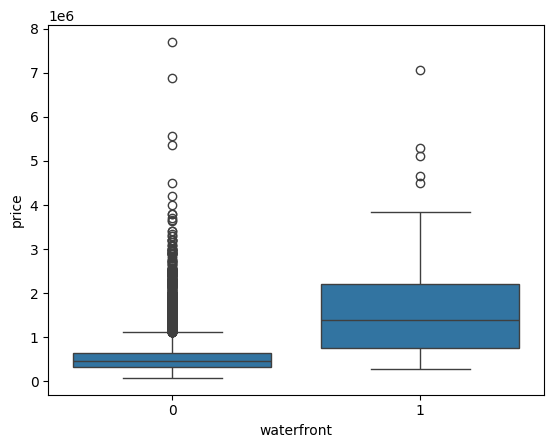

In [ ]:
# Determine whether houses with a waterfront view or without a waterfront view have more price outliers
sns.boxplot(x="waterfront", y="price", data=df)

(0.0, 8081250.0)

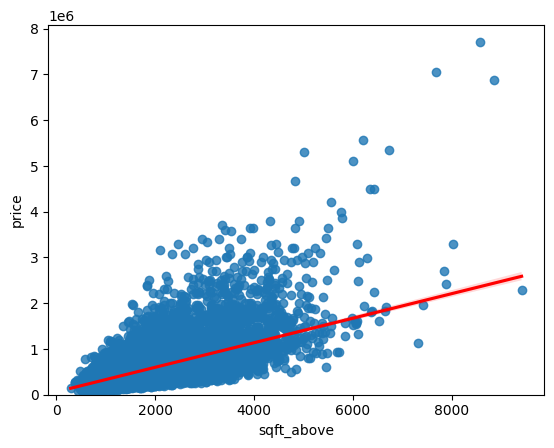

In [28]:
# Determine correlation between feature sqft_above with price.
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})
plt.ylim(0,)

In [29]:
# Use the Pandas method corr() to find the feature other than price that is most correlated with price
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

### Model Development

In [34]:
# Fit a linear regression model using the longitude feature 'long' and caculate the R-squared
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [35]:
# Fit a linear regression model using the square footage of home feature 'sqft_living' and caculate the R-squared
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

In [36]:
# Fit a linear regression model to predict the 'price' using the list of features
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
Z = df[features]
lm = LinearRegression()
lm.fit(Z,Y)
lm.score(Z, Y)

0.6577151058279326

In [ ]:
# Create a list of tuples, the first element in the tuple contains the name of the estimator
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R-squared.
pipe=Pipeline(Input)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.7513467656307783


### Model Evaluation and Refinement

In [38]:
# Split the data into training and testing sets
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
Z = df[features]
Y = df['price']

z_train, z_test, y_train, y_test = train_test_split(Z, Y, test_size=0.15, random_state=1)


print("number of test samples:", z_test.shape[0])
print("number of training samples:",z_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [39]:
# Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R-squared using the test data
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(z_train, y_train)
yhat = RidgeModel.predict(z_test)
print(r2_score(y_test,yhat))

0.6480374087702245


In [40]:
# Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R-squared utilising the test data provided
pr = PolynomialFeatures(degree=2)
z_train_pr = pr.fit_transform(z_train)
z_test_pr = pr.transform(z_test)
RidgeModel.fit(z_train_pr, y_train)
y_hat = RidgeModel.predict(z_test_pr)
print(r2_score(y_test,y_hat))

0.7004432045311566
